# **TIME SERIES FORECASTING - SARIMA PROCESS**

Name: **SARIMA process**  
Date : 2022  
Author: Aurélien Vannieuwenhuyze  


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under the terms of the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a>.
<hr/>

In [ ]:
!pip install statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 11.6 MB/s 
     |████████████████████████████████| 9.9 MB 47.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pnd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import signal
from statsmodels.graphics.tsaplots import  plot_pacf, plot_acf
import statsmodels.api as sm
import numpy as np
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def differencing(TimeSerie, difference_order=1):
	diff = list()
	for i in range(difference_order, len(TimeSerie)):
		value = TimeSerie[i] - TimeSerie[i - difference_order]
		diff.append(value)
	return diff

In [ ]:
def findingLagDifferencing(y,nbTests=20):


  #Test if the time series is not already stationary
  ADF = adfuller(y, autolag='AIC')
  if ADF[1] < 0.05:
    print("The time series is already stationay")
    differenceOrder = 0
    found=False
    diff = y
  else:

  #Loop until the time series is stationary
    differenceOrder = 1
    found=False
    research = True
    while research:

      if differenceOrder<nbTests:
        research=True
        diff = differencing(y, difference_order=differenceOrder)
        ADF = adfuller(diff, autolag='AIC')
      
        if ADF[1] < 0.05:
          research=False
          found=True
        else:
          differenceOrder+=1
      else:
        research=False
        found = False

  return found,differenceOrder,diff

In [ ]:
TS = pnd.read_csv('AirPassengers.csv')

##1: SARIMA (seasonality ARIMA model)

The SARIMA model is expressed as follows:

$$SARIMA(p,d,q)(P,D,Q)_m$$

###1.1: The D order

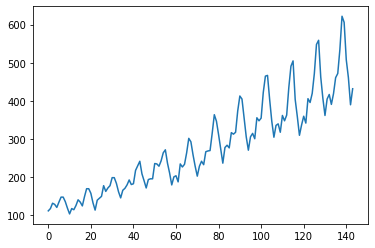

In [ ]:
plt.plot(TS["Yt"])
plt.show()

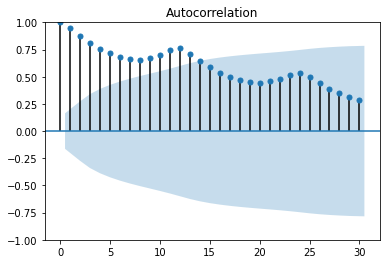

In [ ]:
plot_acf(TS["Yt"],lags=30)
plt.show()

In [ ]:
m=12

In [ ]:
DiffSeasonality = TS["Yt"].diff(m)
DiffSeasonality = DiffSeasonality.dropna()

We have identified the parameter D.  
D=1 because we made a seasonal differentiation

In [ ]:
D=1

###1.2: The d parameter

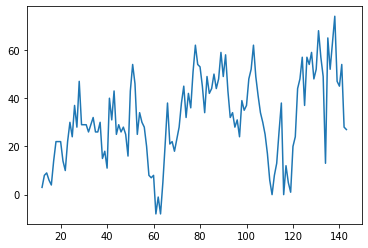

In [ ]:
plt.plot(DiffSeasonality)
plt.show()

####1.2.1: Check if the time series is stationnary

#####1.2.1.1: The ADF Test

- H0: The time series is not stationary
- H1: The time series is stationary



In [ ]:
ADF = adfuller(DiffSeasonality.values)
if ADF[1] < 0.05:
    print("The time series is stationary")
else:
    print("The time series is NOT stationary")

The time series is stationary


#####1.2.1.2: The KPSS ( Kwiatkowski-Phillips-Schmidt-Shin) Test

- H0: The time series is stationary
- H1: The time series is not stationary

In [ ]:
KPSS = kpss(DiffSeasonality.values, regression="c")
if KPSS[1] < 0.05:
    print("The time series is NOT stationary")
else:
    print("The time series is stationary")

The time series is NOT stationary


[]

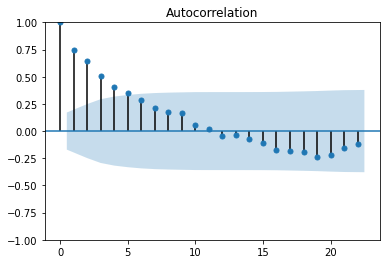

In [ ]:
plot_acf(np.array(DiffSeasonality.values))
plt.plot()

**If the ADF and KPSS tests are not concordant, a new differentiation is performed until the times series is stationary**

#####1.2.1.3: Make another differentiation

In [ ]:
diff = differencing(DiffSeasonality.values, difference_order=1)

In [ ]:
ADF = adfuller(diff)
if ADF[1] < 0.05:
    print("The time series is stationary")
else:
    print("The time series is NOT stationary")

The time series is stationary


In [ ]:
KPSS = kpss(diff, regression="c")
if KPSS[1] < 0.05:
    print("The time series is NOT stationary")
else:
    print("The time series is stationary")

The time series is stationary


As we had to perform only one differentiation to obtain a stationary time series, d=1

In [ ]:
d=1

[]

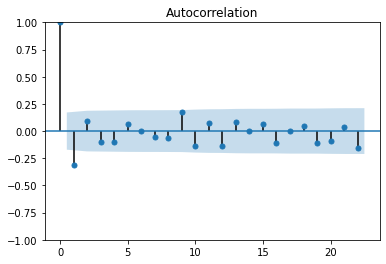

In [ ]:
plot_acf(np.array(diff))
plt.plot()

####1.2.2: The q and Q parameters

The estimation of the parameters p,P,q,Q is probably the most complicated

[]

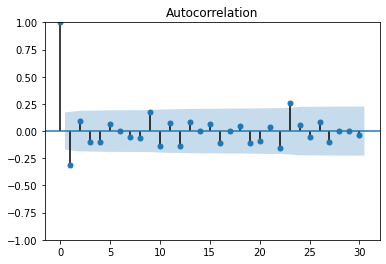

In [ ]:
plot_acf(np.array(diff),lags=30)
plt.plot()

**Seasonal part (Q)**  
m=12  
We have to look at all the time periods m  
lag: 1, lag 12, lag 24....  

- lag 1: Significant
- lag 12: Non significant

Then Q = 1


**Non seasonal part (q)**  
q = 1



In [ ]:
q=1
Q=1

####1.2.1: The p and P parameters

[]

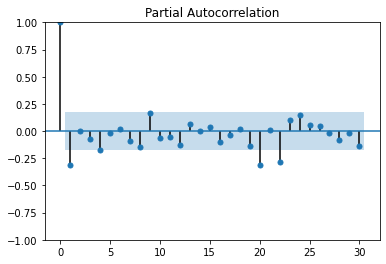

In [ ]:
plot_pacf(np.array(diff),lags=30)
plt.plot()

**Seasonal part (Q)**  
m=12  
We have to look at all the time periods m  
lag: 1, lag 12, lag 24....  

- lag 1: Significant
- lag 12: Non significant

Then P = 1


**Non seasonal part (q)**  
q = 1

In [ ]:
p=1

In [ ]:
P=1

###1.3: Train the SARIMA model

$$SARIMA(1,1,1)(1,1,1)_{12}$$

In [ ]:
print("SARIMA (",p,",",d,",",q,") (",P,",",D,",",Q,") [",m,"]")

SARIMA ( 1 , 1 , 1 ) ( 1 , 1 , 1 ) [ 12 ]


In [ ]:
testPeriod = 12
train = TS["Yt"].iloc[0:len(TS)-testPeriod]
test = TS["Yt"].iloc[len(TS)-testPeriod:]

In [ ]:
SARIMA = pm.ARIMA(order=(p, d,q),seasonal_order=(P,D,Q,12))

In [ ]:
SARIMA.fit(train)

ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

In [ ]:
SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -445.483
Date:                            Sun, 11 Dec 2022   AIC                            902.966
Time:                                    10:23:28   BIC                            919.641
Sample:                                         0   HQIC                           909.737
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4870      2.347      0.634      0.526      -3.113       6.088
ar.L1         -0.4934      0.323     -1.530      0.126      -1.126       0.139
ma.L1          0.2521      0.351      0.719      0.472      -0.435       0.940
ar.S.L12      -0.9991      0.176     -5.676      0.000      -1.344      -0.654
ma.S.L12       0.9862      1.418      0.695      0.487      -1.793       3.766
sigma2        98.0477    118.254      0.829      0.407    -133.726     329.821
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.99   Prob(JB):                         0.75
Heteroskedasticity (H):               1.58   Skew:                            -0.06
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###1.4: Model evaluation

In [ ]:
n_periods = testPeriod
fc, confint = SARIMA.predict(n_periods=n_periods, return_conf_int=True)

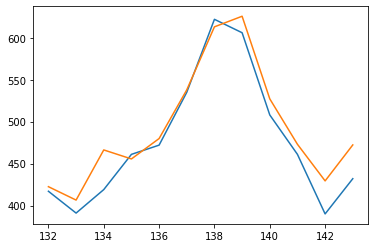

In [ ]:
plt.plot(test)
plt.plot(fc)
plt.show()

####1.4.1: Residuals analysis

In [ ]:
residuals = pnd.DataFrame()
residuals["Yt"] = test
residuals["Prediction"] = fc
residuals["residuals"] = residuals["Yt"] - residuals["Prediction"]

#####1.4.1.1: No correlation between residuals

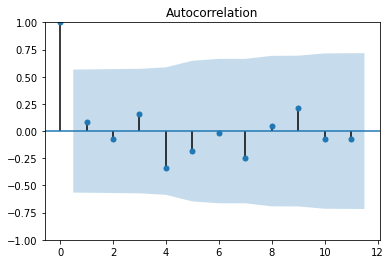

In [ ]:
plot_acf(residuals["residuals"])
plt.show()

The residuals are no correlated

#####1.4.1.2: The residuals must be normally distributed

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(residuals["residuals"])
print("Shapiro p-value ",shapiro_test.pvalue)

if (shapiro_test.pvalue>0.05):
  print("Residuals are normally distributed")
else:
  print("Residuals are NOT normally distributed")

Shapiro p-value  0.46128836274147034
Residuals are normally distributed


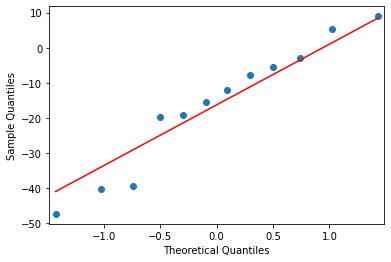

In [ ]:
sm.qqplot(residuals["residuals"], line='s')
plt.show()

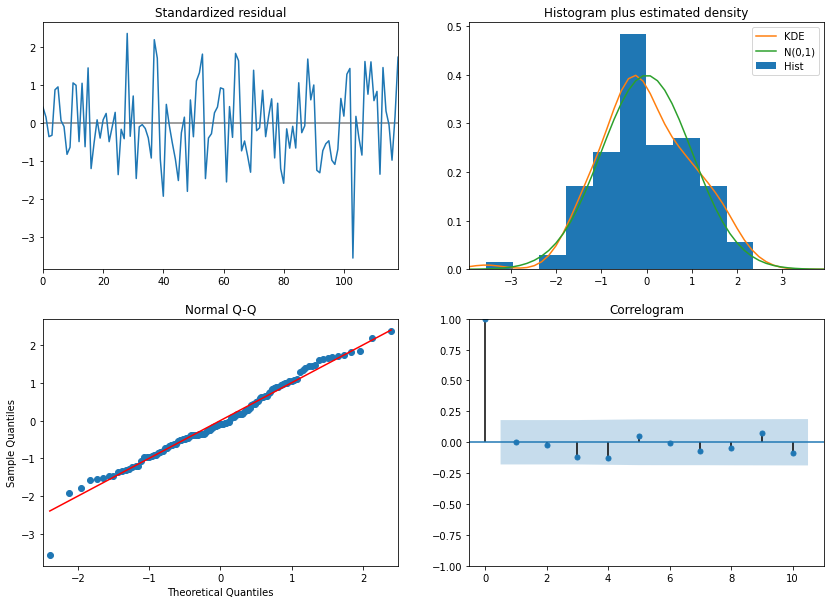

In [ ]:
SARIMA.plot_diagnostics(figsize=(14,10))
plt.show()

####1.4.2: Metrics

In [ ]:
RMSE = mean_squared_error(residuals["Yt"], residuals["Prediction"], squared=False)
print("RMSE :",RMSE)

RMSE : 23.72524601405317


###1.5: Forecasting

In [ ]:
#We retrain on the entire Time Series for better results
SARIMA.fit(TS["Yt"])

ARIMA(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

In [ ]:
n_periods = 24
fc, confint = SARIMA.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(TS["Yt"]), len(TS["Yt"])+n_periods)
fc_series = pnd.Series(fc, index=index_of_fc)  

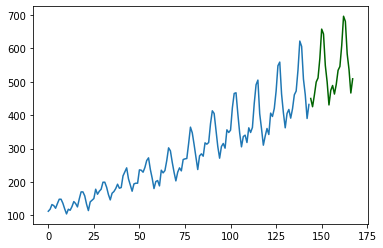

In [ ]:
plt.plot(TS.values)
plt.plot(fc_series, color='darkgreen')
plt.show()

###1.7: PMD Auto-Arima

In [ ]:
AUTOMATIC_MODEL = pm.auto_arima(train.values, 
                      start_p=0,          #Start p order (AR)
                      start_q=0,          #Start q order (MA)
                      test='adf',         # ADF for stationnarity
                      max_p=10, max_q=10, # max p and q for AR/MA (Optional)
                      d=None,             # No value for d, this is what we are looking for

                      seasonal=True,      #Seasonality
                      m=12,               #Period of seasonality

                      start_P=0, 
                      start_Q=0,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=905.065, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=900.823, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=901.721, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=899.902, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=901.052, Time=0.13 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=901.337, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=900.971, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=900.685, Time=0.04 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=902.967, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=901.457, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.736 seconds


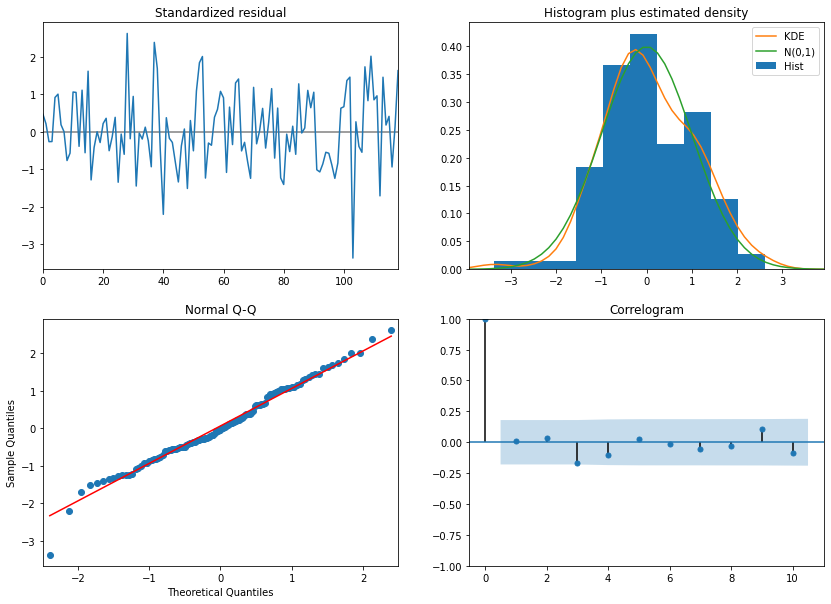

In [ ]:
AUTOMATIC_MODEL.plot_diagnostics(figsize=(14,10))
plt.show()

In [ ]:
n_periods = testPeriod
fc, confint = AUTOMATIC_MODEL.predict(n_periods=n_periods, return_conf_int=True)


residuals = pnd.DataFrame()
residuals["Yt"] = test
residuals["Prediction"] = fc
residuals["residuals"] = residuals["Yt"] - residuals["Prediction"]


RMSE = mean_squared_error(residuals["Yt"], residuals["Prediction"], squared=False)
print("RMSE :",RMSE)

RMSE : 23.93167319781741
